In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import read_classification_dataset, features_histograms_mean_std
# import sklearn
from sklearnex import patch_sklearn
from sklearn.calibration import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report


import joblib

from kneed import KneeLocator

patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [23]:


train, target, test = read_classification_dataset(2)
X, y = train.values, target.values.flatten()

In [34]:

# p  = train.isna().sum(axis=0)
# p.values.sort()
# # len(np.where(np.isnan(p))[0])
# h = Counter(p)
# [h[i] for i in range(90,101)]
# k = len(train) - train.count()
# k[k > 90]

[32, 24, 25, 18, 22, 24, 22, 18, 11, 10, 0]

In [47]:
model_2 = Pipeline([
      ('Scaler', StandardScaler()),
    #   ('Imputer', KNNImputer()),
      ('PCA', PCA(n_components=18)),
      ('KNN', KNeighborsClassifier())
    ])

param_grid_2 = [
    {
        # "Imputer": [KNNImputer(weights='distance')],
        # "Imputer__n_neighbors":[1,3,7,21],
        "KNN__n_neighbors":[1,3,7,21],
        "KNN": [KNeighborsClassifier(weights="distance", n_jobs=-1)]
    },
]
X_imp = KNNImputer(n_neighbors=3, weights='distance').fit_transform(X)
grid_2 = GridSearchCV(model_2, param_grid_2, scoring="f1_weighted")
grid_2.fit(X_imp, y)
print(grid_2.best_score_)
print(grid_2.best_params_)
best_model_2 = grid_2.best_estimator_


0.8144285714285715
{'KNN': KNeighborsClassifier(n_jobs=-1, weights='distance'), 'KNN__n_neighbors': 21}


In [48]:
res = grid_2.cv_results_
param_scores = list((zip(res["rank_test_score"],res["mean_test_score"],res["params"], )))
param_scores.sort(key=lambda x: x[0])
param_scores

[(1,
  0.8144285714285715,
  {'KNN': KNeighborsClassifier(n_jobs=-1, weights='distance'),
   'KNN__n_neighbors': 21}),
 (2,
  0.8094761904761905,
  {'KNN': KNeighborsClassifier(n_jobs=-1, weights='distance'),
   'KNN__n_neighbors': 7}),
 (3,
  0.7910952380952381,
  {'KNN': KNeighborsClassifier(n_jobs=-1, weights='distance'),
   'KNN__n_neighbors': 1}),
 (4,
  0.7575714285714286,
  {'KNN': KNeighborsClassifier(n_jobs=-1, weights='distance'),
   'KNN__n_neighbors': 3})]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         8

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



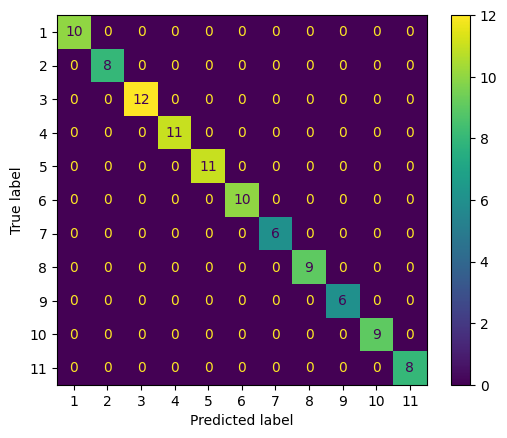

In [49]:
# best_model_path = './models/c_2_Scale_KNNI(1)_PCA(18)_KNN(7).pkl'
# joblib.dump(grid_2.best_estimator_, best_model_path)
# best_model = joblib.load(best_model_path)

pred = best_model_2.predict(X_imp)
print(classification_report(y, pred))
fig = ConfusionMatrixDisplay.from_predictions(y, pred)

In [12]:
pred = best_model_2.predict(test.values)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         9
           9       1.00      1.00      1.00         6
          10       1.00      1.00      1.00         9
          11       1.00      1.00      1.00         8

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



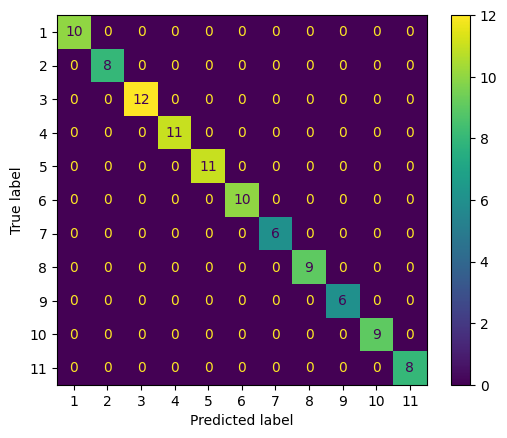